In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/drive/MyDrive/noise_rating_modelling/freeways_image.png')

def pixel_from_image(image):
  # Apply image processing to extract highways

  # For example, using Canny edge detection:
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  edges = cv2.Canny(gray_image, 50, 150)

  # Find contours of the edges
  contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Draw contours on the original image
  cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

  # Display the image with contours
  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

  # Extract coordinates
  freeway_coordinates = []
  for contour in contours:
      for point in contour:
          x, y = point[0]
          freeway_coordinates.append((x, y))

  # Print the coordinates
  # for coord in freeway_coordinates:
  #     # print(f"Pixel Coordinate: {coord}")

  # # Display the original image and the red-highlighted image
  # # cv2.imshow('Original Image', image)
  # cv2_imshow(red_highlight)
  # cv2.waitKey(0)
  # cv2.destroyAllWindows()

  # # Display or save the coordinates
  # print(freeway_coordinates)
  return freeway_coordinates


def pixel_to_geographic(pixel_coords, geotransform):
    """
    Convert pixel coordinates to geographic coordinates using the provided geotransform.

    Parameters:
    - pixel_coords: List of pixel coordinates [(x1, y1), (x2, y2), ...]
    - geotransform: Geotransform information (tuple of 6 values)

    Returns:
    - List of geographic coordinates [(lon1, lat1), (lon2, lat2), ...]
    """
    lon_lat_coords = []

    for x, y in pixel_coords:
        lon = geotransform[0] + geotransform[1] * x + geotransform[2] * y
        lat = geotransform[3] + geotransform[4] * x + geotransform[5] * y
        lon_lat_coords.append((lat, lon))
    # print(lon_lat_coords)
    return lon_lat_coords

from scipy.spatial.distance import euclidean

def find_nearest_freeway(house_coordinates, geographic_coordinates):
    min_distance = float('inf')
    print("min_distance",min_distance)
    nearest_freeway = None

    for freeway_coords in geographic_coordinates:
        # print(freeway_coords)
        distance = euclidean(house_coordinates, freeway_coords)

        if distance < min_distance:
            min_distance = distance
            nearest_freeway = freeway_coords

    return nearest_freeway, min_distance


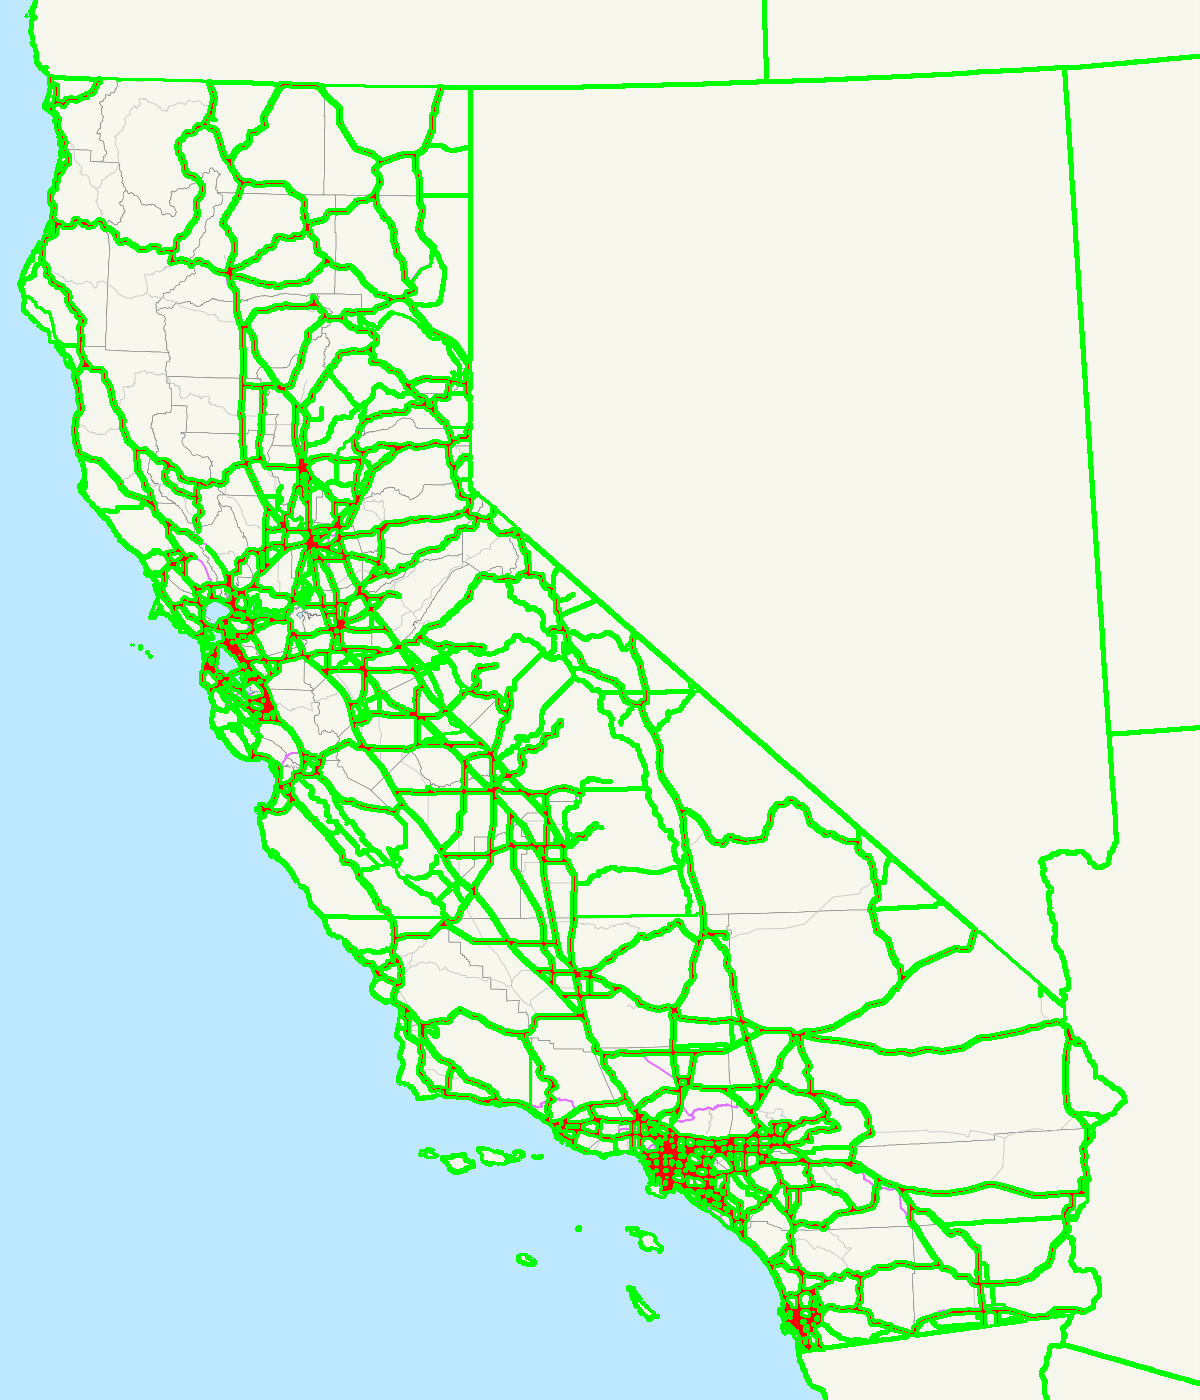

Image Width: 1200 pixels
Image Height: 1400 pixels
Number of Channels: 3
min_distance inf
For house coordinates (32.76913783812447, -117.05745519773639), the nearest freeway is (32.90962908214286, -117.06455658333333) with a distance of 0.14067060575411558


In [4]:
freeway_coordinates = pixel_from_image(image)

# Example usage for 1D vectors:
house_coordinates_1d = (32.76913783812447, -117.05745519773639)

# Check if the image is successfully loaded
if image is not None:
  # Get image height, width, and number of channels
  height, width, channels = image.shape

  print(f"Image Width: {width} pixels")
  print(f"Image Height: {height} pixels")
  print(f"Number of Channels: {channels}")

else:
  print("Failed to load the image.")

max_lat = 42.002418
min_lat = 32.537805
max_long =-114.152041
min_long = -124.224141

lon_resolution = (max_long - min_long) / width
lat_resolution = (max_lat - min_lat) / height

# Replace with your actual geotransform obtained from the image
geotransform = (min_long, lon_resolution, 0, max_lat, 0, -lat_resolution)

#lets extract geo_corrdinates from freeway pixel
geographic_coordinates = pixel_to_geographic(freeway_coordinates, geotransform)

#lets find nearest_freeway
nearest_freeway_1d, min_distance_1d = find_nearest_freeway(house_coordinates_1d, geographic_coordinates)

print(f"For house coordinates {house_coordinates_1d}, the nearest freeway is {nearest_freeway_1d} with a distance of {min_distance_1d}")

#End of Script

## Aditional resource below

In [ ]:
# Load the image with circles indicating houses

# houses_image = cv2.imread('/content/drive/MyDrive/noise_rating_modelling/houses_image.jpg', cv2.IMREAD_GRAYSCALE)

# # Apply HoughCircles to detect circles
# circles = cv2.HoughCircles(
#     houses_image,
#     cv2.HOUGH_GRADIENT,
#     dp=1,               # Inverse ratio of the accumulator resolution to the image resolution.
#     minDist=5,         # Minimum distance between the centers of the detected circles.
#     param1=50,          # Upper threshold for the internal Canny edge detector.
#     param2=30           # Threshold for center detection.
# )

# # Extract coordinates of houses
# house_coordinates = []
# if circles is not None:
#     circles = np.uint16(np.around(circles))
#     for circle in circles[0, :]:
#         house_coordinates.append((circle[0], circle[1]))

# # Display or save the coordinates
# print(house_coordinates)

In [ ]:
# import heapq
# import math

# def calculate_distance(point1, point2):
#     # print("h2")
#     return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# def find_nearest_freeway(house_coordinates, freeway_coordinates):
#     # print("h3")
#     graph = {}

#     for house in house_coordinates:
#         graph[house] = []
#         print("step 1 in func graph",graph)

#         for freeway in freeway_coordinates:
#             distance = calculate_distance(house, freeway)
#             graph[house].append((freeway, distance))
#             # print("step 2 in func graph",graph)

#     return graph

# def find_minimum_value(graph_dict, key):
#     values = graph_dict[key]
#     min_value = float('inf')
#     min_coords = None

#     for coords, value in values:
#         if value < min_value:
#             min_value = value
#             min_coords = coords

#     return min_coords, min_value

# print("End")

End


In [ ]:
# geographic_coordinates

#algo to find min distance efficiently

# import networkx as nx
# from scipy.spatial.distance import euclidean

# # Example house and freeway coordinates
# house_coordinates = [(32.76913783812447, -117.05745519773639),(32.79387788153145, -117.06077026848858)]
# # freeway_coordinates = [(49, 75), (49, 83), (50, 84), (50, 85)]

# # Create a graph
# G = nx.Graph()

# # Add house and freeway nodes to the graph
# for house_id, house_coords in enumerate(house_coordinates):
#     G.add_node(f'house_{house_id}', coords=house_coords)

# for freeway_id, freeway_coords in enumerate(geographic_coordinates):
#     G.add_node(f'freeway_{freeway_id}', coords=freeway_coords)

# # Connect each house node to each freeway node with an edge weighted by the distance
# for house_id, house_coords in enumerate(house_coordinates):
#     for freeway_id, freeway_coords in enumerate(geographic_coordinates):
#         # print("checking_coord",house_id,freeway_id)
#         distance = euclidean(house_coords, freeway_coords)

# min_distance = min(distance)
# print(f"for house coordinates {house_coords} minmum freeway {} and distance is{min_distance}")

#         # G.add_edge(f'house_{house_id}', f'freeway_{freeway_id}', weight=distance)

# print("G",G)

# # Run Dijkstra's algorithm to find the shortest path to any freeway
# source_node = f'house_0'
# shortest_paths = nx.single_source_dijkstra_path_length(G, source=source_node, weight='weight')

# print("sp",shortest_paths)

# # Find the freeway with the minimum distance
# nearest_freeway_id = min(shortest_paths, key=shortest_paths.get)
# nearest_freeway_distance = shortest_paths[nearest_freeway_id]

# print(f"The nearest freeway is {nearest_freeway_id} with a distance of {nearest_freeway_distance}")

# # Print coordinates of the house and the nearest freeway
# house_coords = G.nodes[f'house_0']['coords']
# nearest_freeway_coords = G.nodes[nearest_freeway_id]['coords']

# print(f"House coordinates: {house_coords}")
# print(f"Nearest freeway coordinates: {nearest_freeway_coords}")
